In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
print(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])
len(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


19

1.8828757597682129


<Axes: >

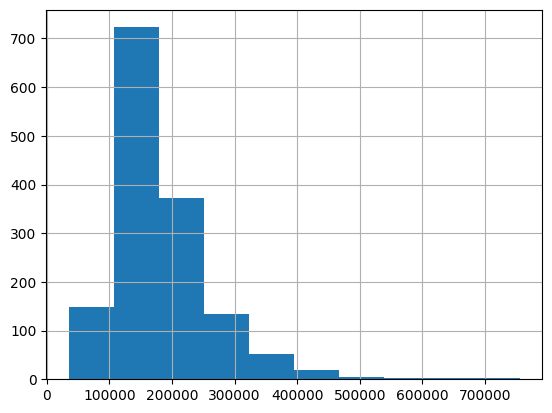

In [5]:
import numpy as np
print(df['SalePrice'].skew())
df['SalePrice'].hist()

### Log Transformation To Reduce Skewness

In [6]:
import numpy as np

df['SalePrice'] = np.log1p(df['SalePrice'])  # Applies log(1 + x)

0.12134661989685329


<Axes: >

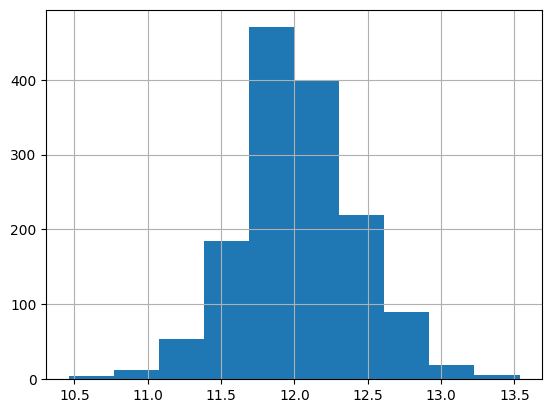

In [7]:
import numpy as np
print(df['SalePrice'].skew())
df['SalePrice'].hist()

# Now the target variable is following the normal distribution and the outliers does not affect the models which assume the data is normal is nature

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
38


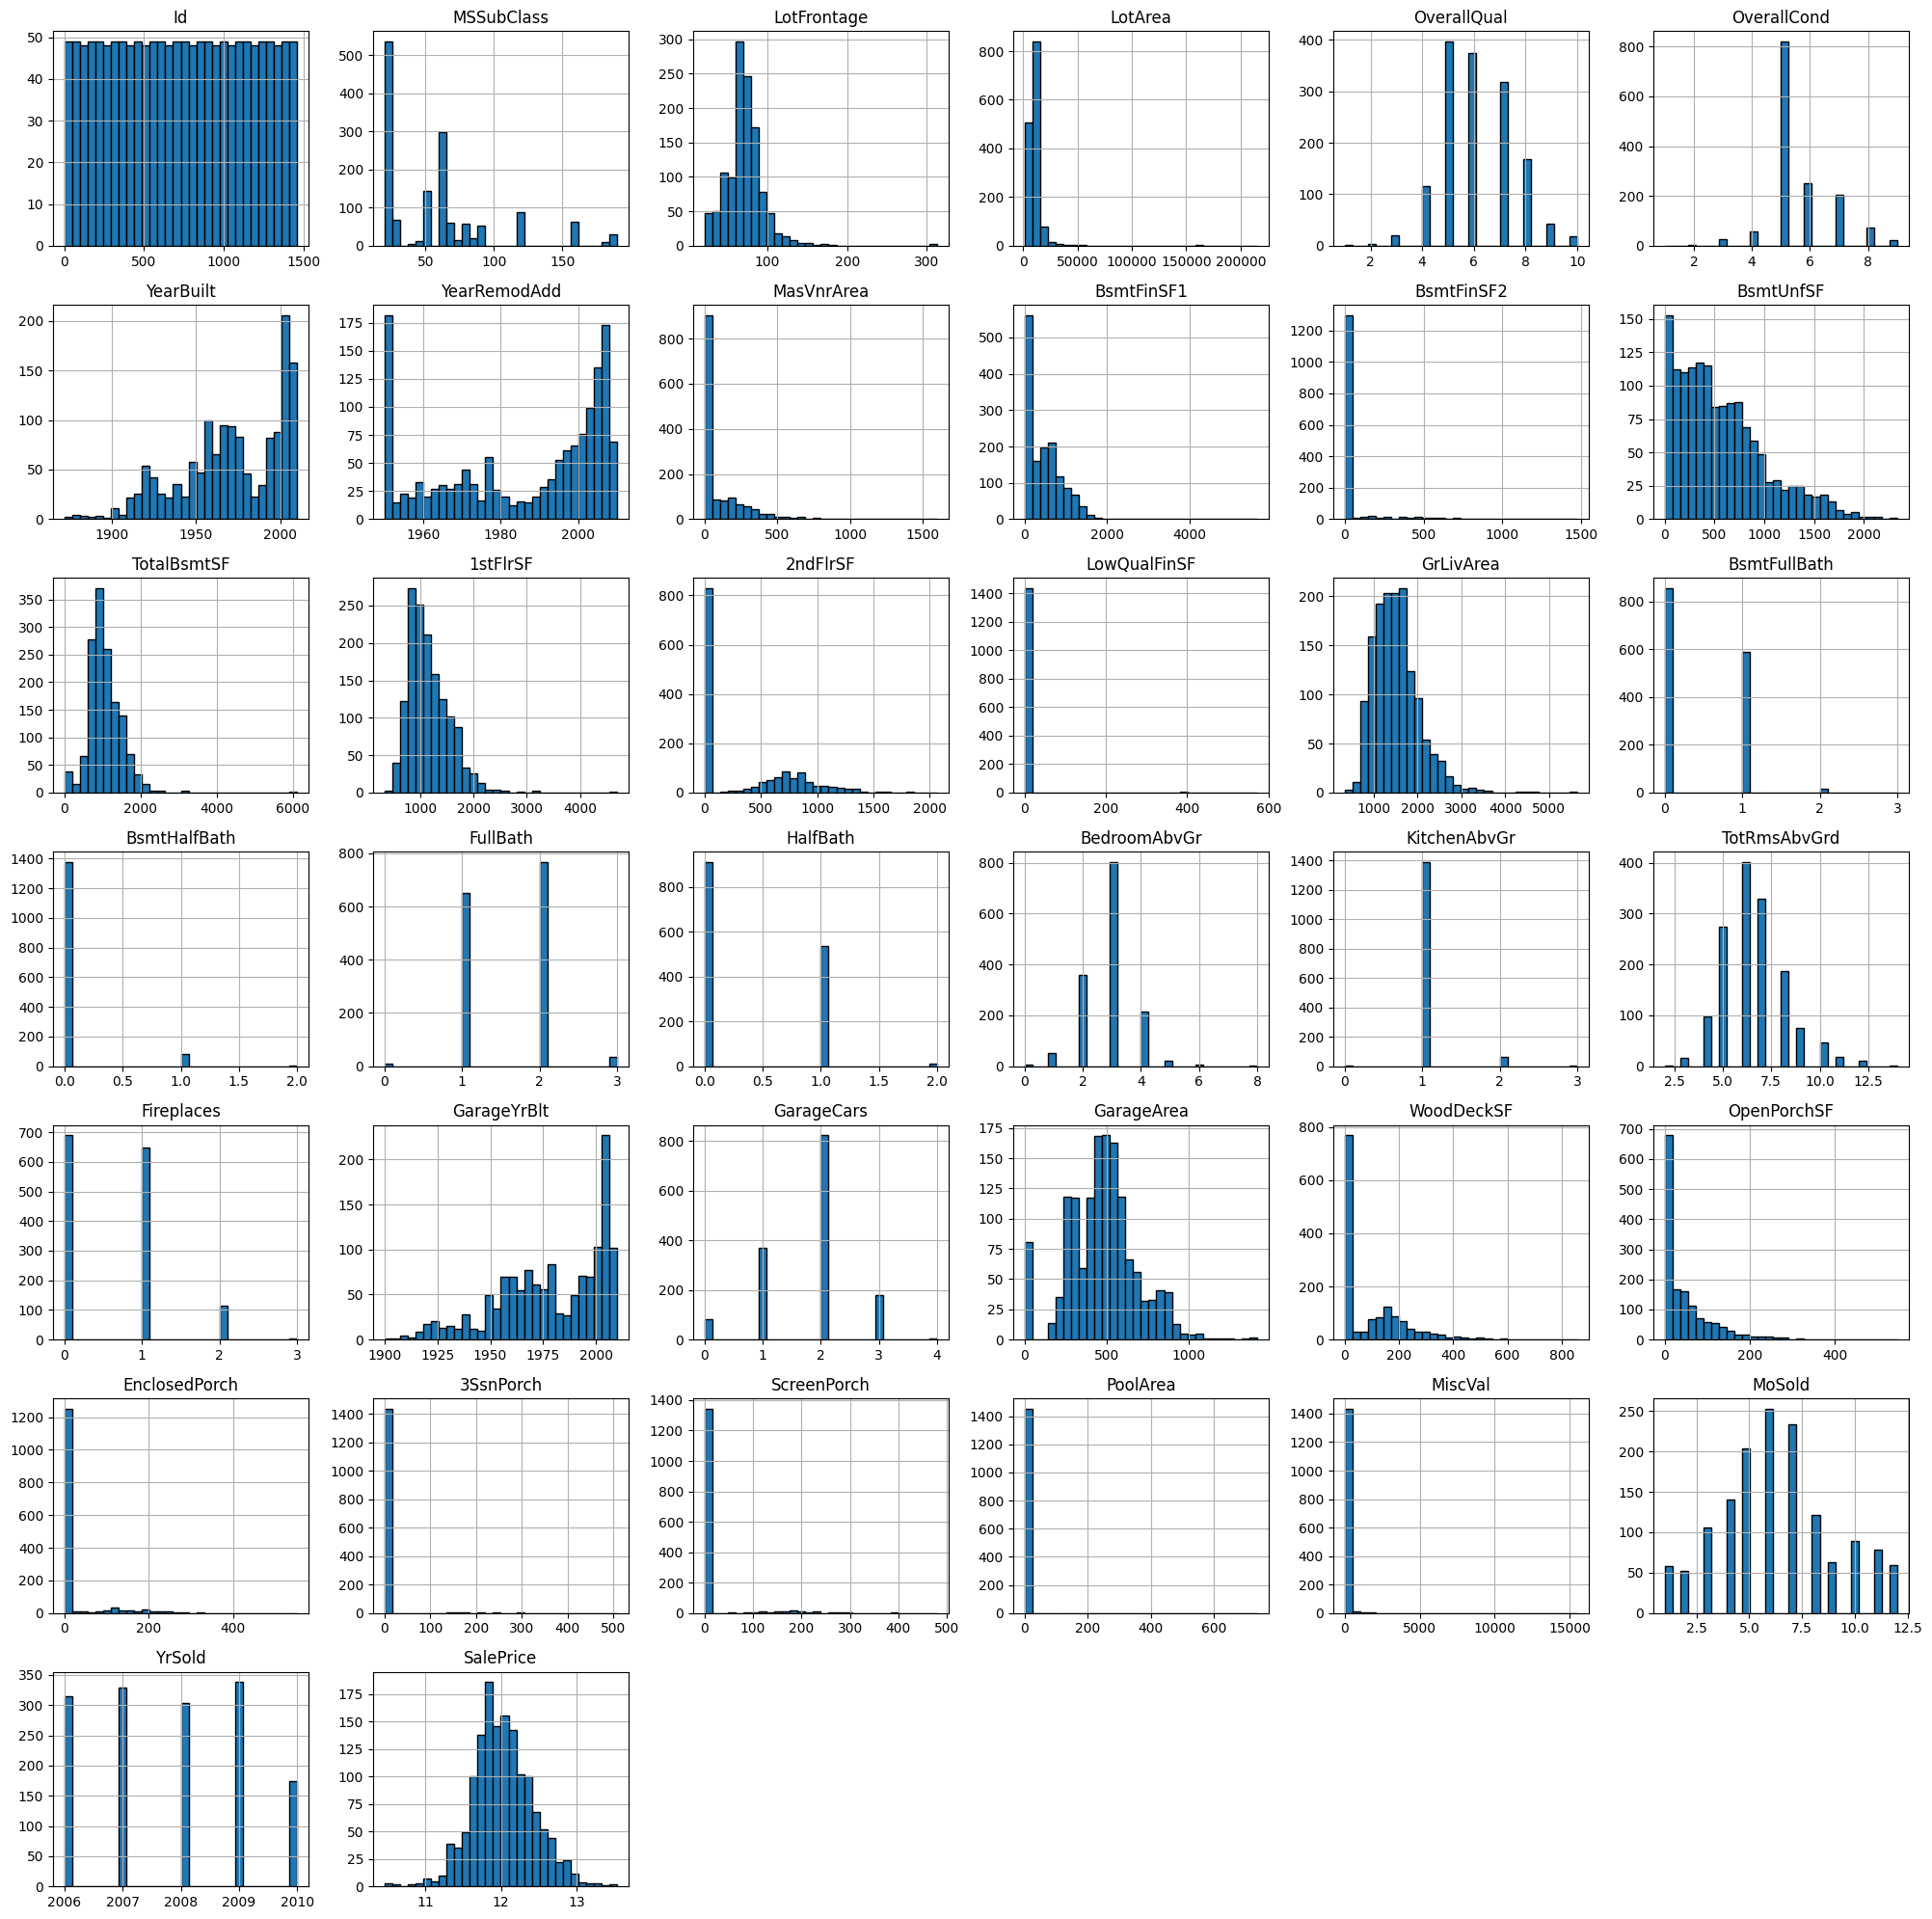

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)
print(len(numeric_cols))
import matplotlib.pyplot as plt

df[numeric_cols].hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import skew

numeric_feats = df.select_dtypes(include=['int64', 'float64'])
skewness = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewness[skewness > 0.75]
print(high_skew)
print(len(high_skew))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64
21


In [10]:
for feat in high_skew.index:
    df[feat] = np.log1p(df[feat])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


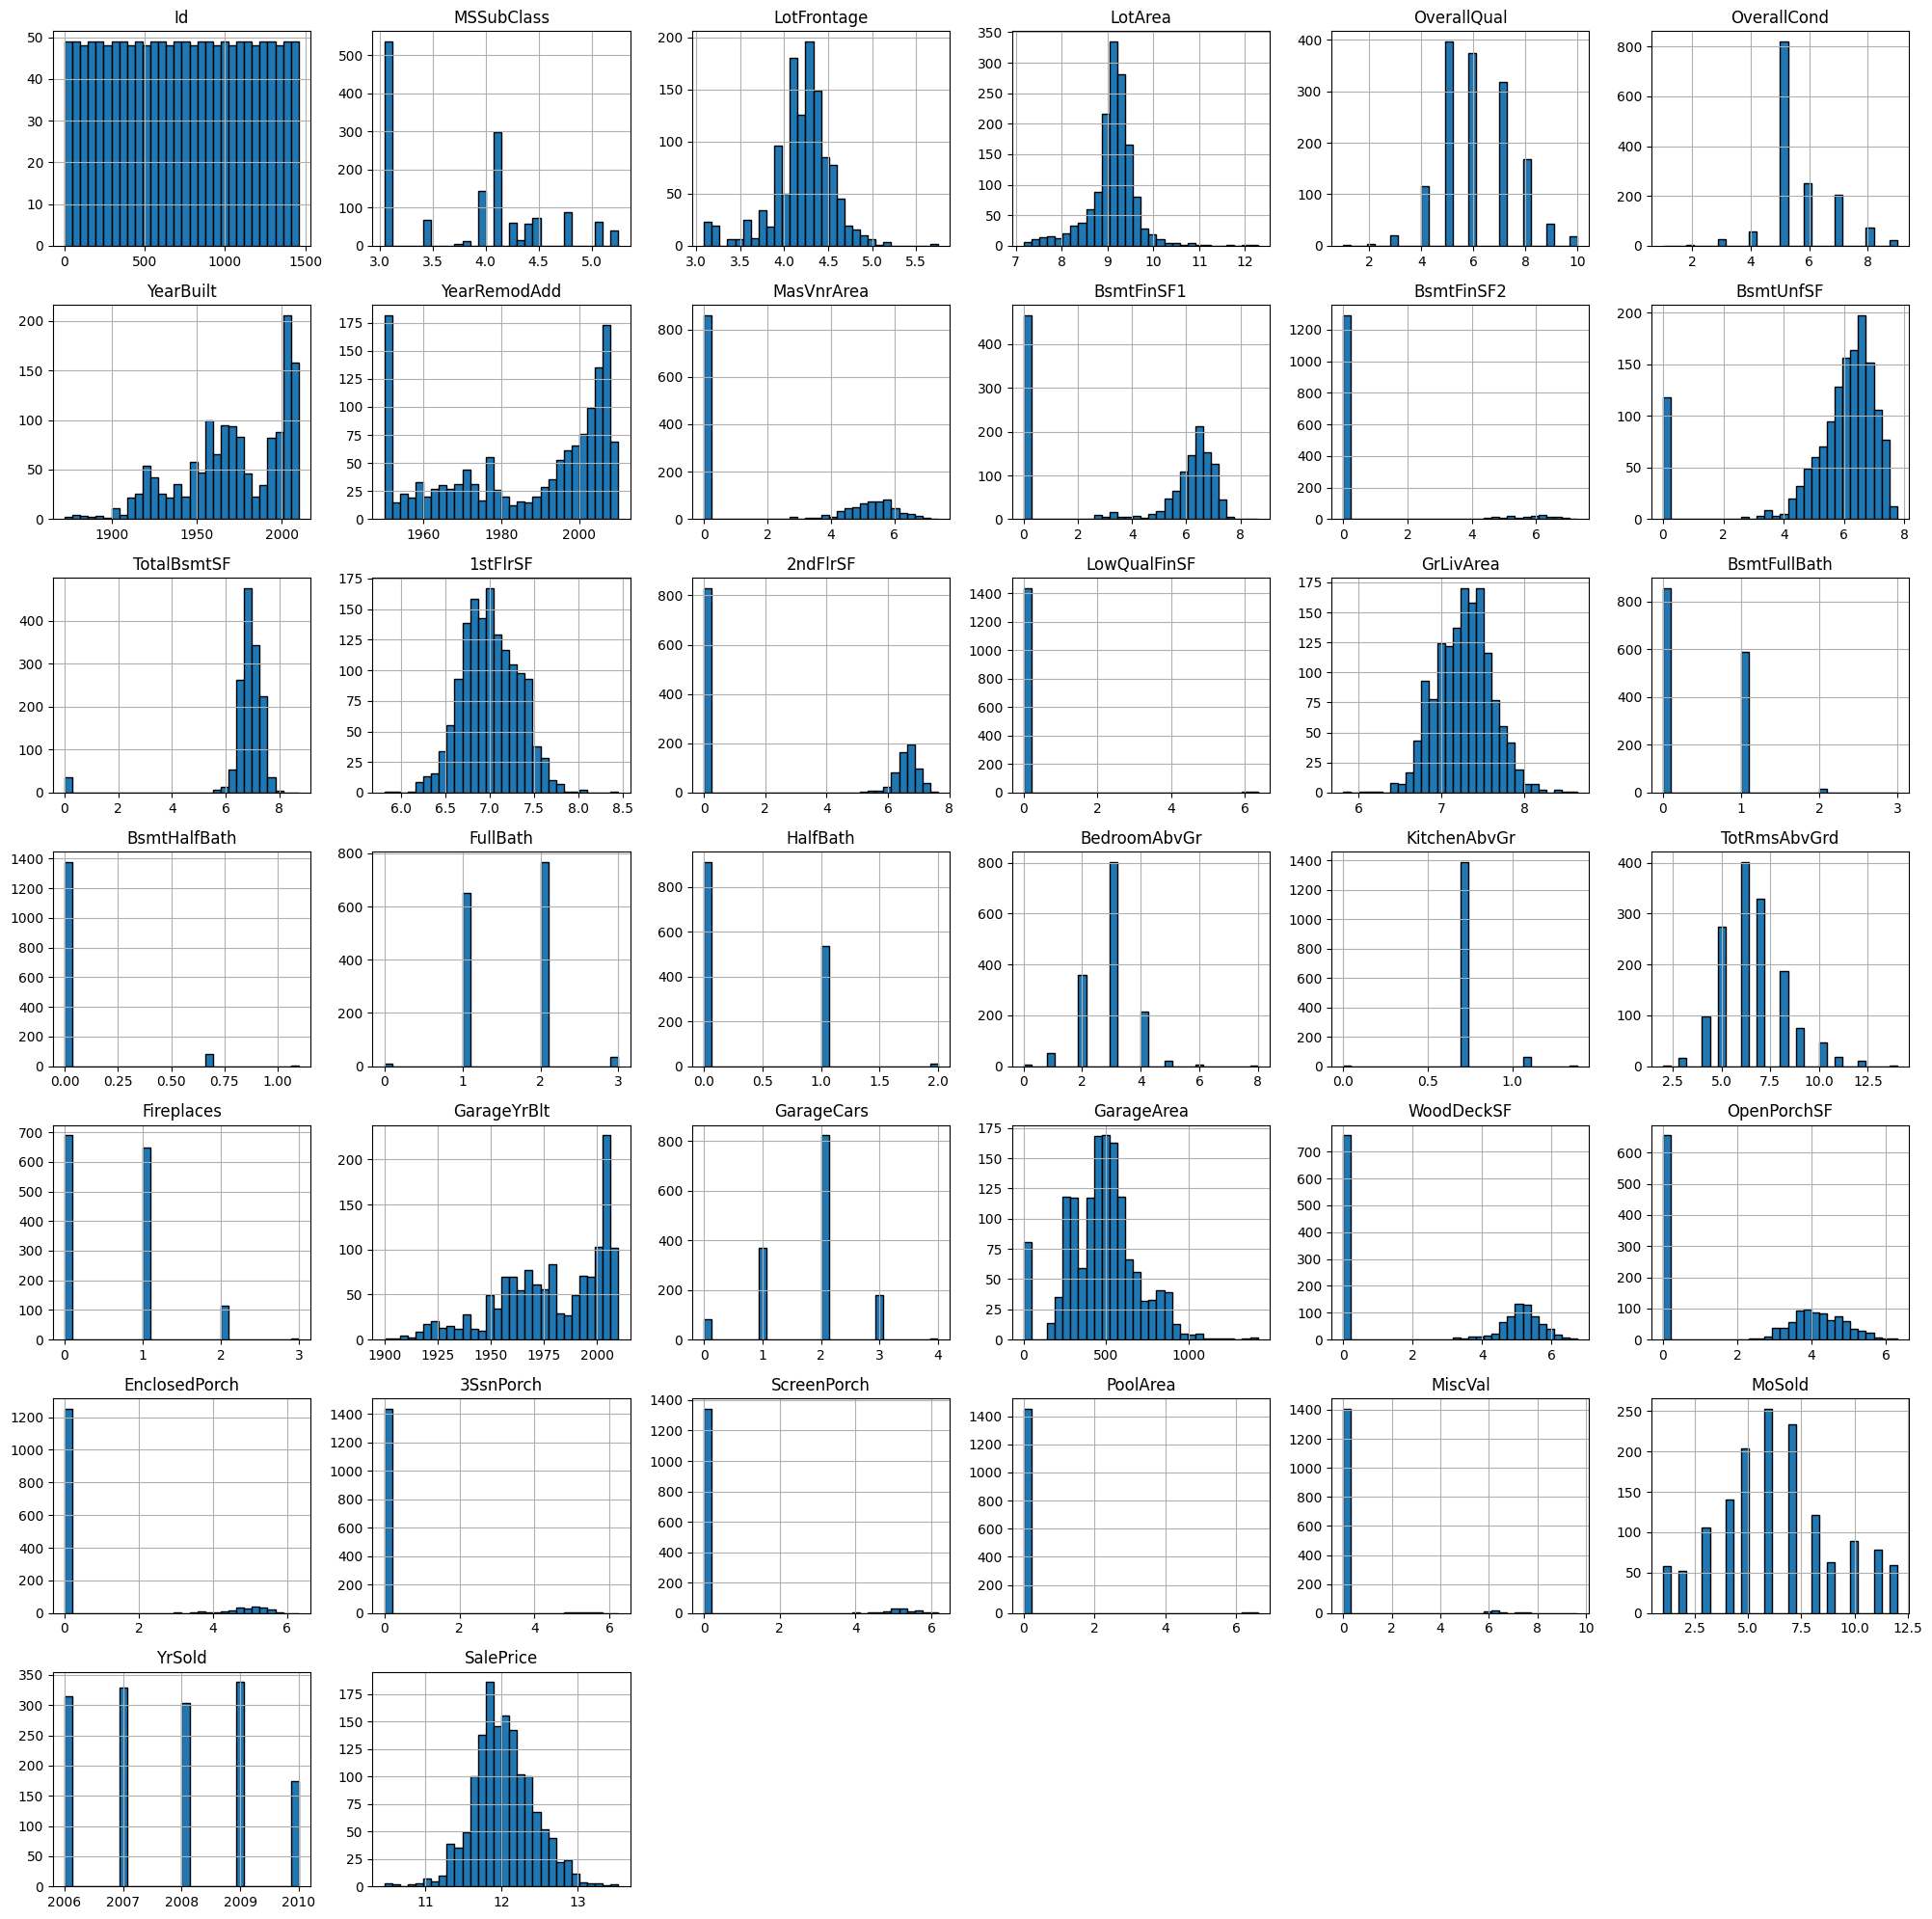

In [11]:
df[numeric_cols].hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
numeric_feats = df.select_dtypes(include=['int64', 'float64'])
skewness = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewness[skewness > 0.75]
print(high_skew)
print(len(high_skew))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64
9


In [ ]:
# Converting Binary for rare/sparse features
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
df['Has3SsnPorch'] = (df['3SsnPorch'] > 0).astype(int)
df['HasLowQualSF'] = (df['LowQualFinSF'] > 0).astype(int)
df['HasMiscVal'] = (df['MiscVal'] > 0).astype(int)
df['HasScreenPorch'] = (df['ScreenPorch'] > 0).astype(int)

# Optionally drop the original sparse features
df.drop(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch'], axis=1, inplace=True)

binary_cols = ['HasPool', 'Has3SsnPorch', 'HasLowQualSF', 'HasMiscVal', 'HasScreenPorch']
df[binary_cols] = df[binary_cols].astype('category')


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
33


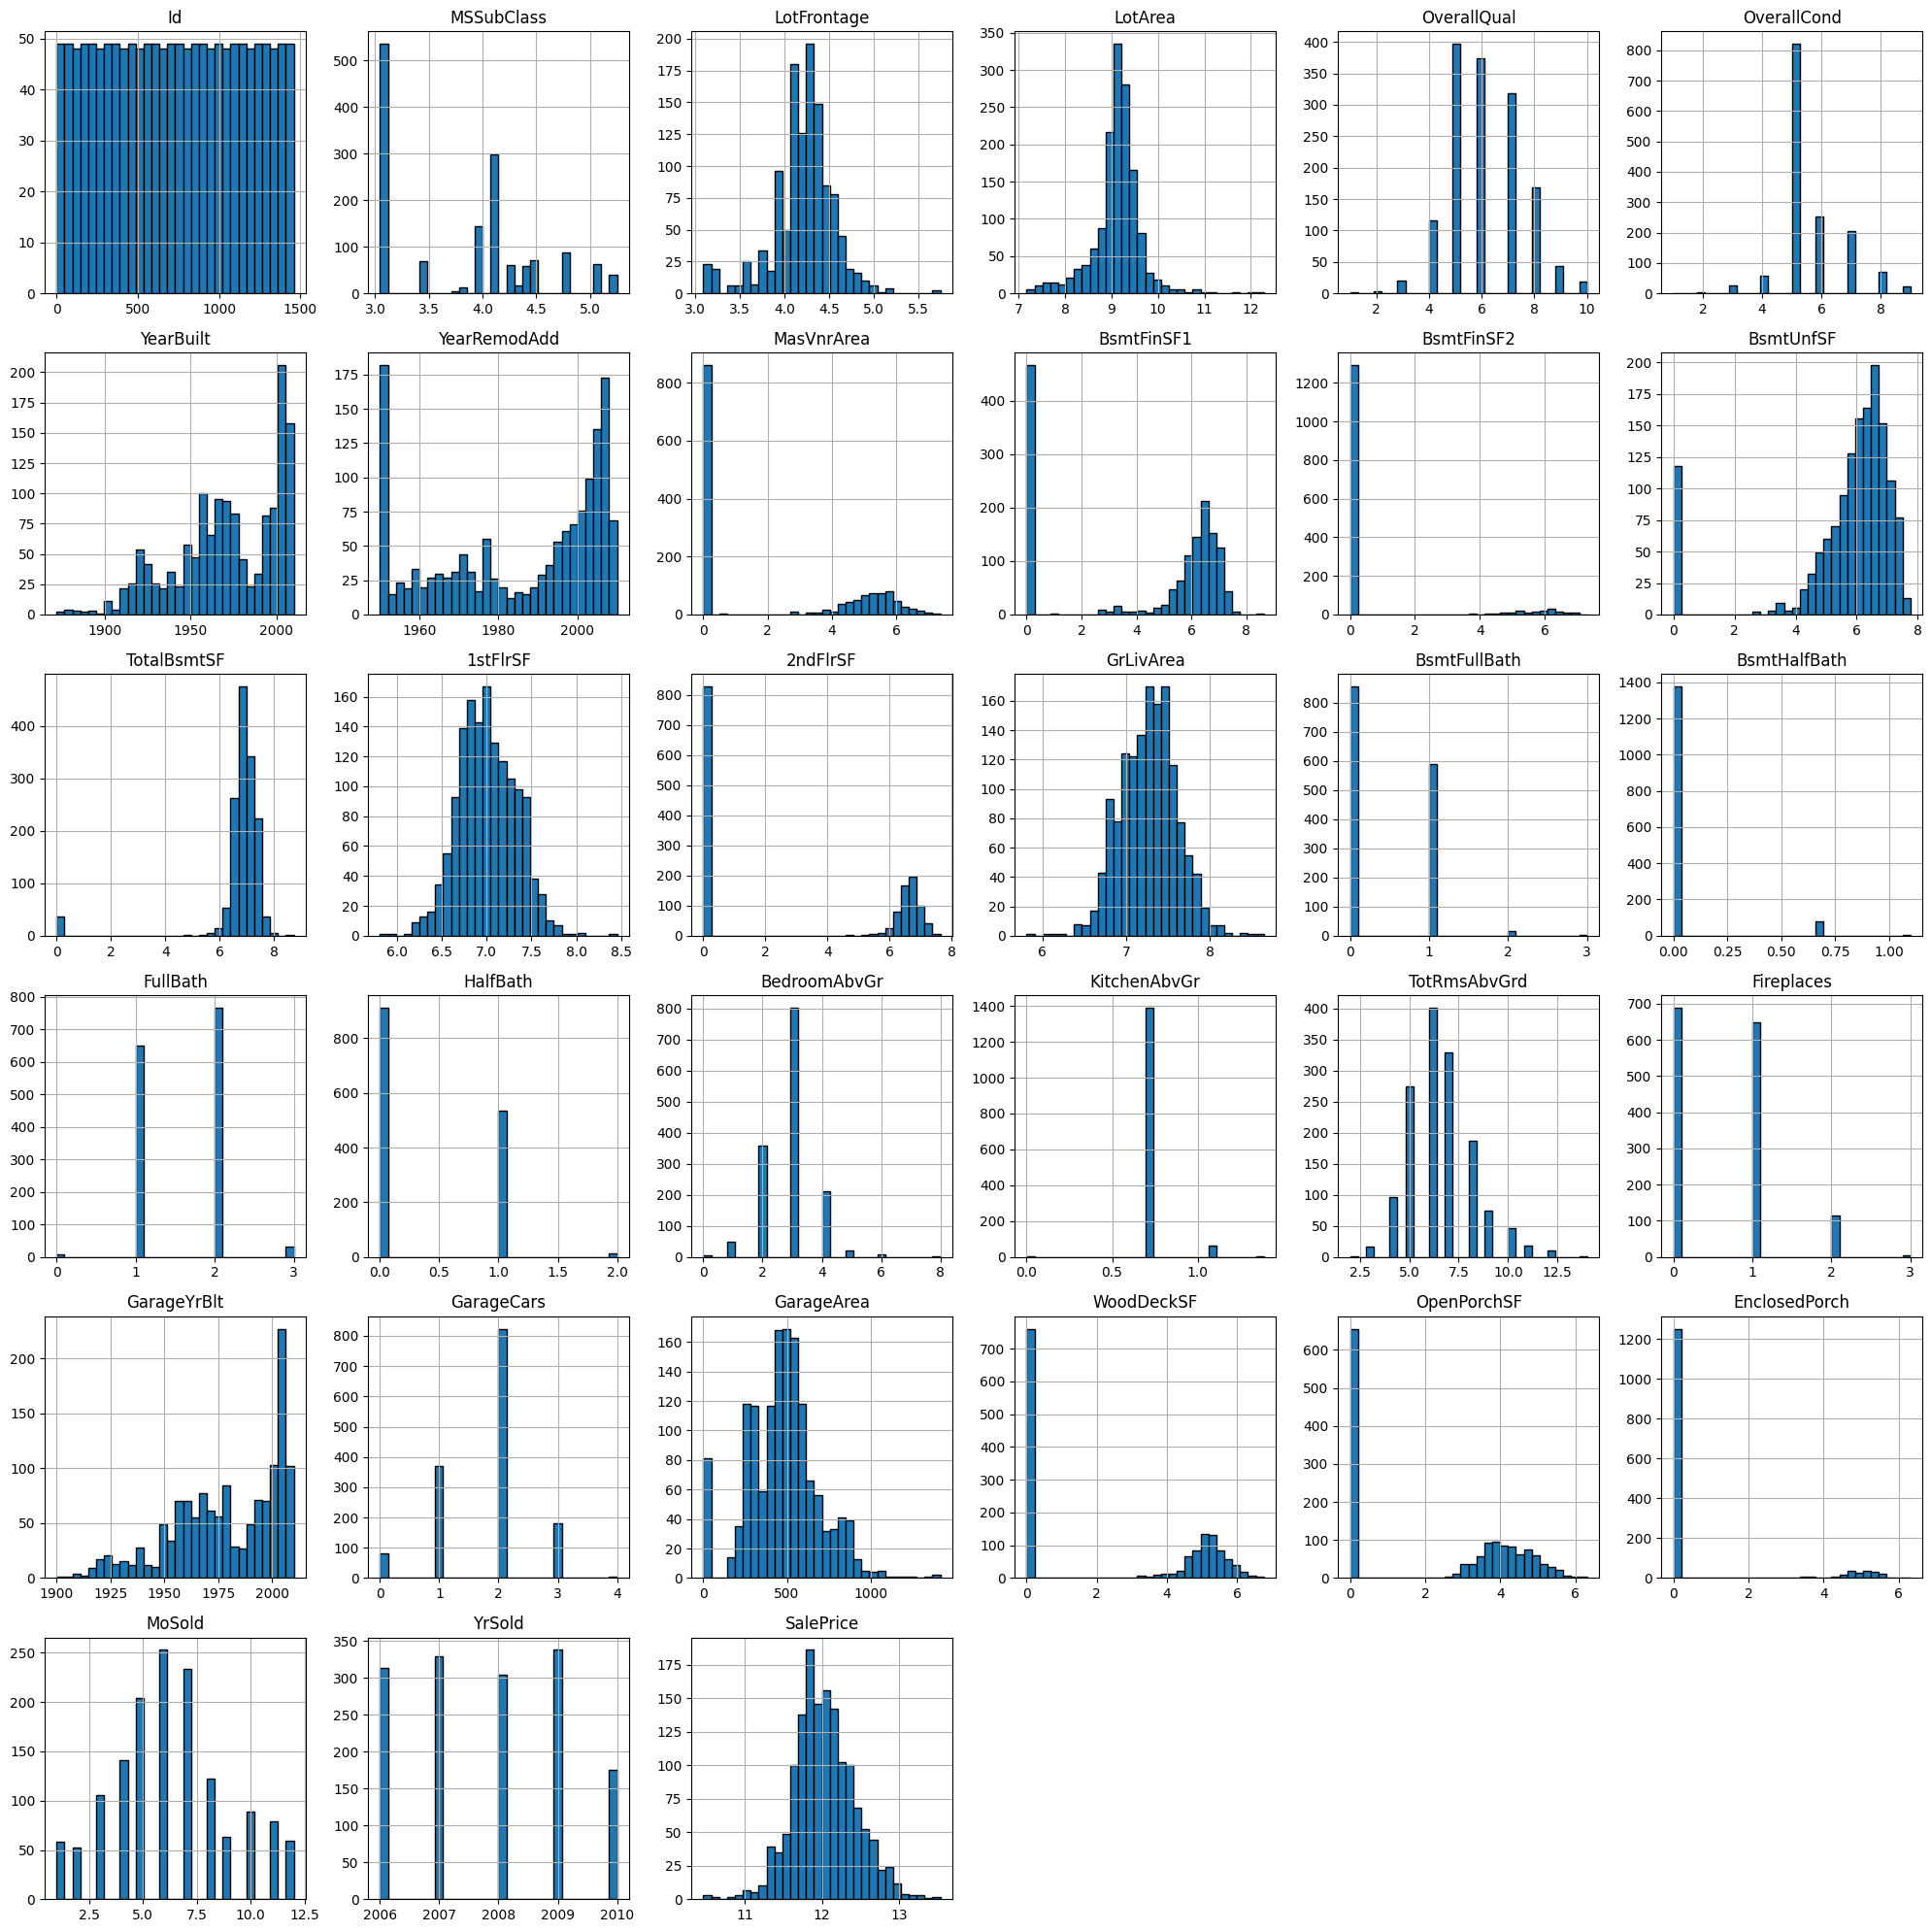

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)
print(len(numeric_cols))
import matplotlib.pyplot as plt

df[numeric_cols].hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [15]:
numeric_feats = df.select_dtypes(include=['int64', 'float64'])
skewness = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewness[skewness > 0.75]
print(high_skew)
print(len(high_skew))

BsmtHalfBath     3.929022
KitchenAbvGr     3.865437
BsmtFinSF2       2.521100
EnclosedPorch    2.110104
dtype: float64
4


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


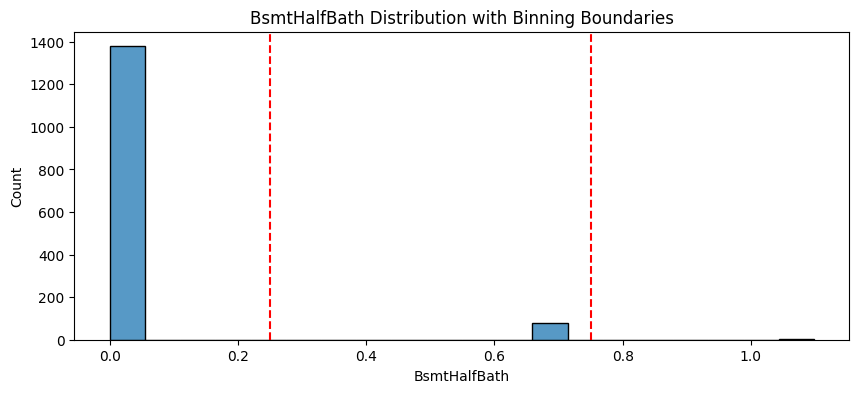

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


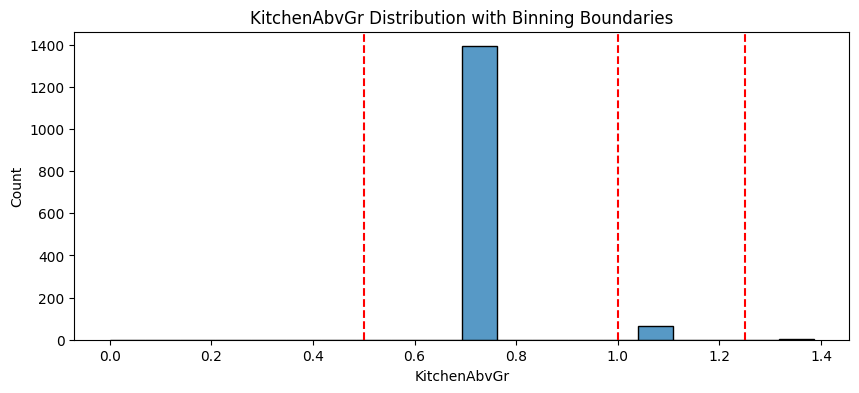

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot BsmtHalfBath
plt.figure(figsize=(10, 4))
sns.histplot(df['BsmtHalfBath'], bins=20, kde=False, edgecolor='black')
plt.axvline(0.25, color='red', linestyle='--')
plt.axvline(0.75, color='red', linestyle='--')
plt.title('BsmtHalfBath Distribution with Binning Boundaries')
plt.xlabel('BsmtHalfBath')
plt.show()

# Plot KitchenAbvGr
plt.figure(figsize=(10, 4))
sns.histplot(df['KitchenAbvGr'], bins=20, kde=False, edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--')
plt.axvline(1.0, color='red', linestyle='--')
plt.axvline(1.25, color='red', linestyle='--')
plt.title('KitchenAbvGr Distribution with Binning Boundaries')
plt.xlabel('KitchenAbvGr')
plt.show()


In [17]:
import pandas as pd

# Bin BsmtHalfBath into 3 custom categories
df['BsmtHalfBathBin'] = pd.cut(
    df['BsmtHalfBath'],
    bins=[-0.01, 0.25, 0.75, float('inf')],
    labels=['None', 'Small', 'Large']
).astype('category')

# Bin KitchenAbvGr into 4 custom categories
df['KitchenAbvGrBin'] = pd.cut(
    df['KitchenAbvGr'],
    bins=[-0.01, 0.5, 1.0, 1.25, float('inf')],
    labels=['None', 'Single', 'SlightlyMore', 'Multiple']
).astype('category')

# Optionally drop original columns
df.drop(['BsmtHalfBath', 'KitchenAbvGr'], axis=1, inplace=True)


In [ ]:
#Combining the BsmtFinSF1 with BsmtFinSF2 
df['TotalBsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df.drop('BsmtFinSF2', axis=1, inplace=True)

df['HasEnclosedPorch'] = (df['EnclosedPorch'] > 0).astype('category')
df.drop('EnclosedPorch', axis=1, inplace=True)

In [19]:
numeric_feats = df.select_dtypes(include=['int64', 'float64'])
skewness = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewness[skewness > 0.75]
print(high_skew)
print(len(high_skew))

Series([], dtype: float64)
0


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'TotalBsmtFinSF'],
      dtype='object')
30


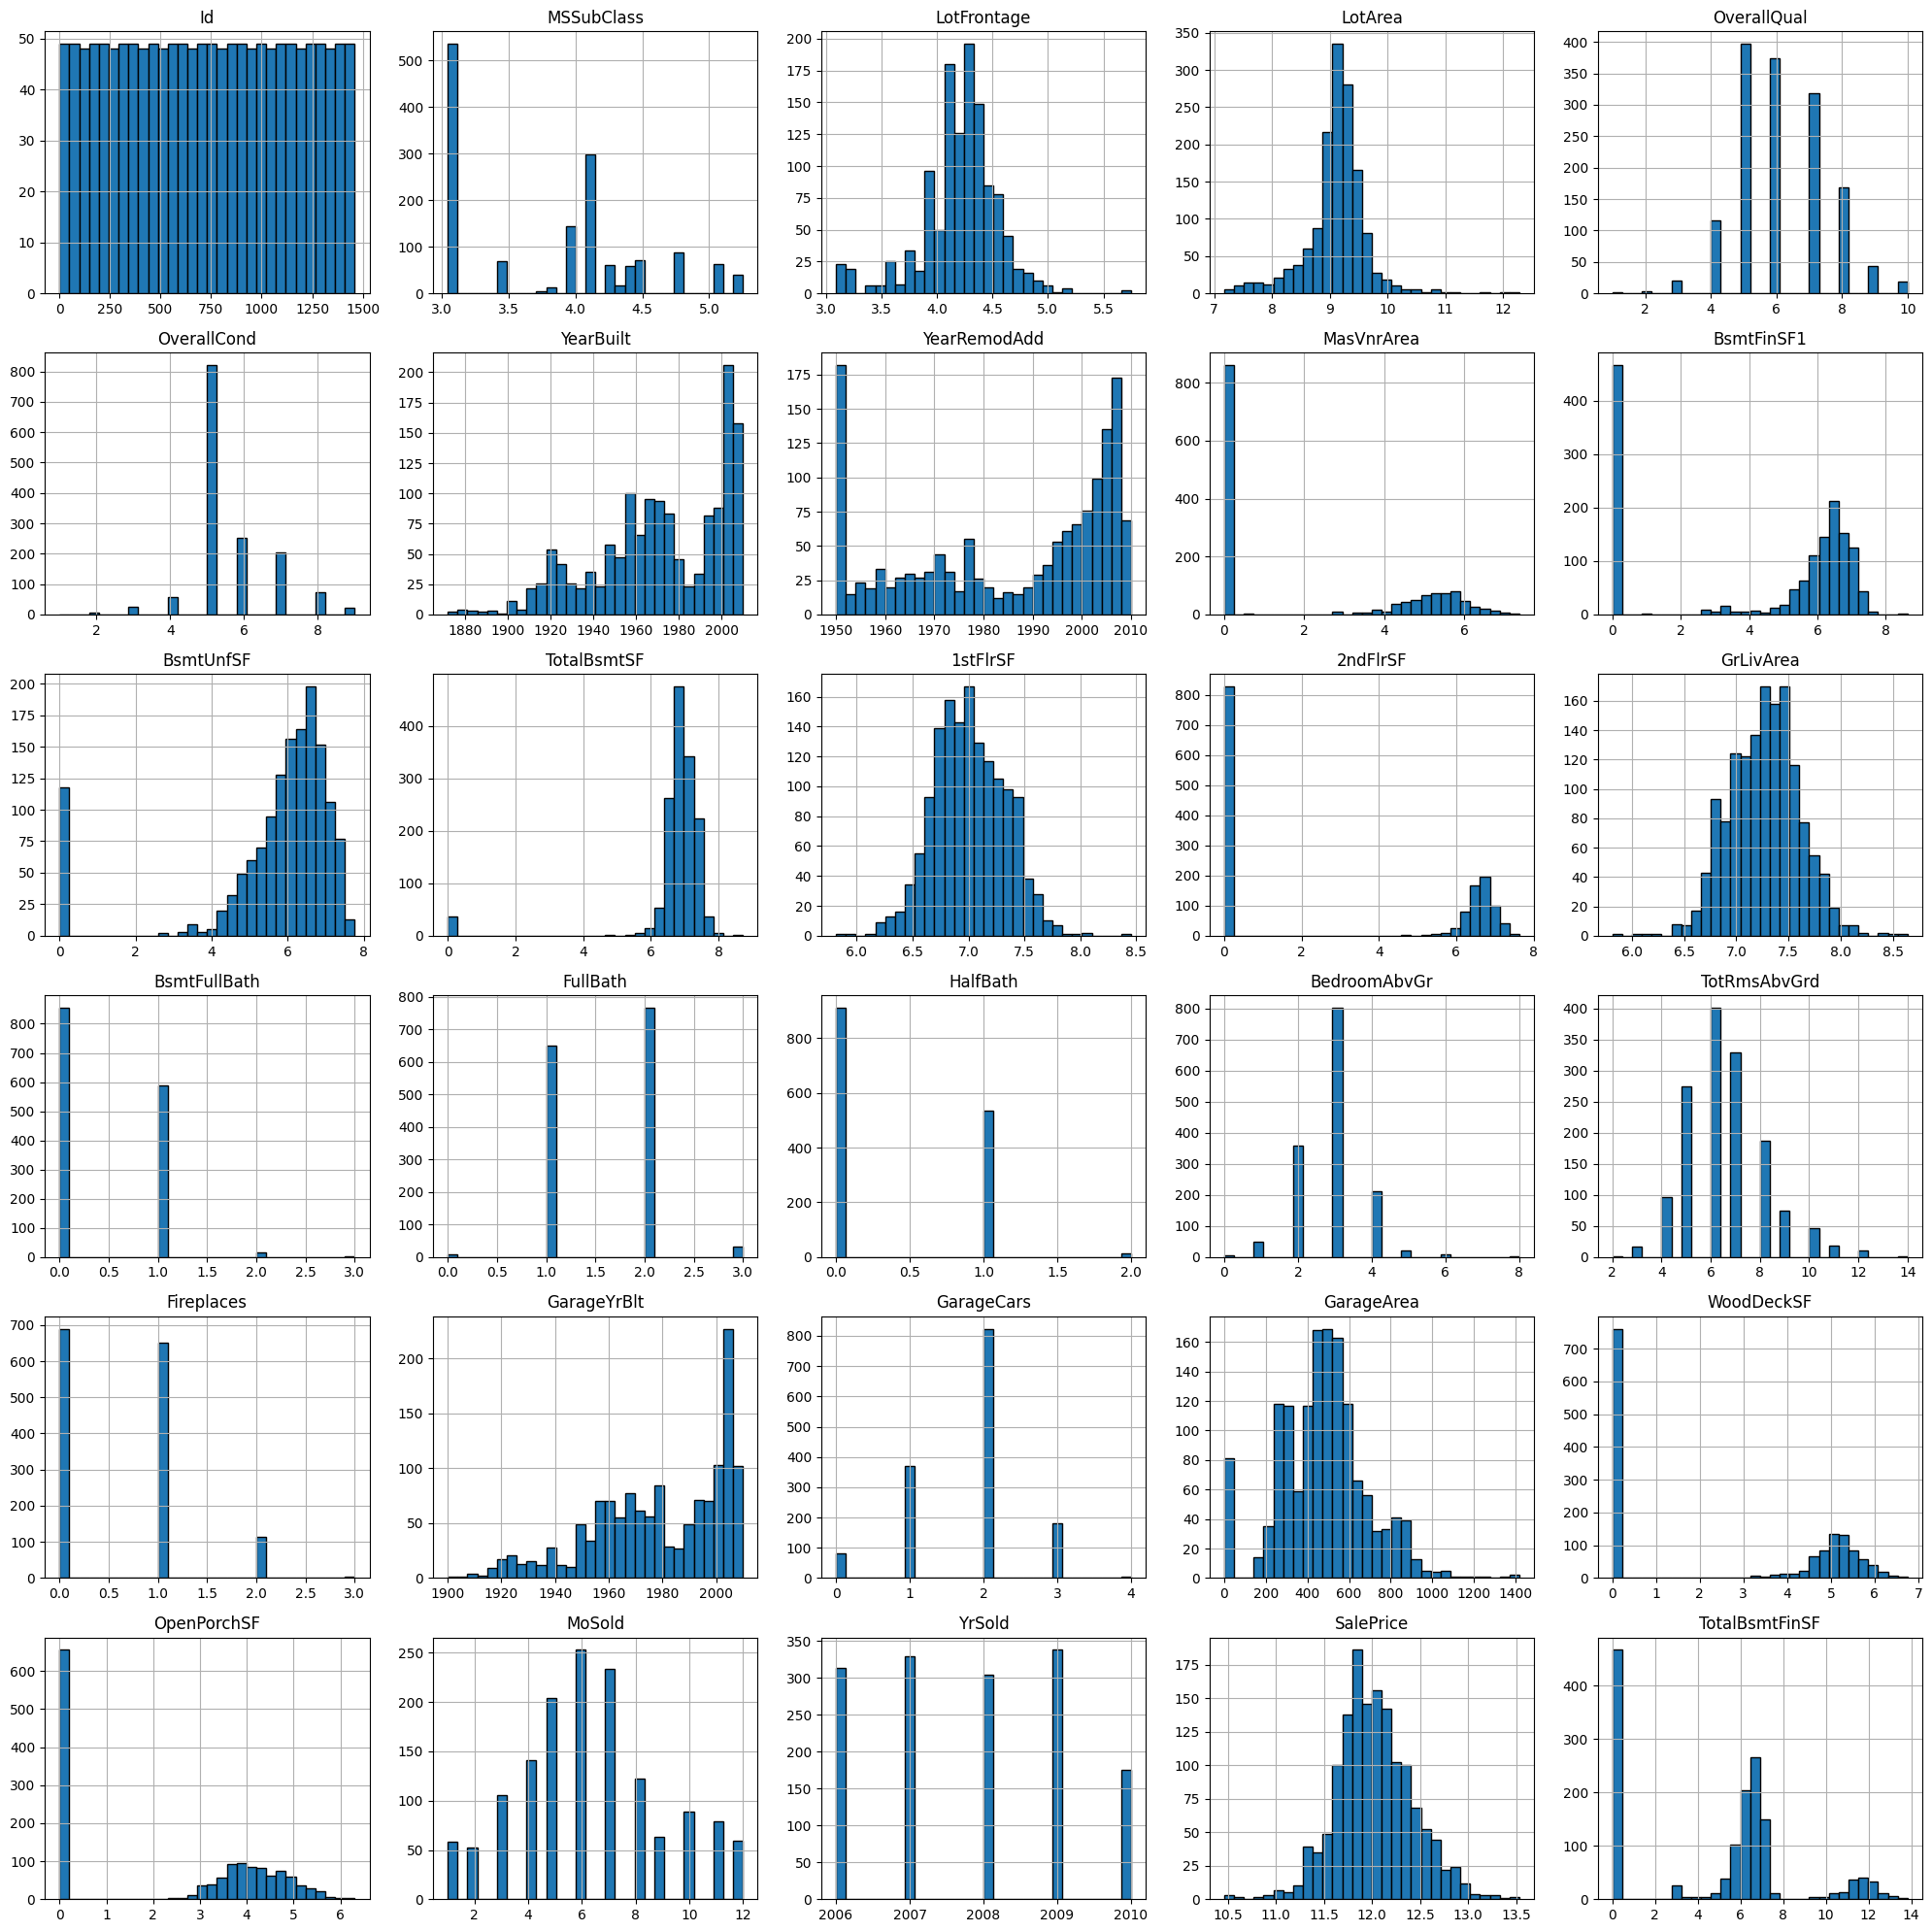

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)
print(len(numeric_cols))
import matplotlib.pyplot as plt

df[numeric_cols].hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1460 non-null   int64   
 1   MSSubClass        1460 non-null   float64 
 2   MSZoning          1460 non-null   object  
 3   LotFrontage       1201 non-null   float64 
 4   LotArea           1460 non-null   float64 
 5   Street            1460 non-null   object  
 6   Alley             91 non-null     object  
 7   LotShape          1460 non-null   object  
 8   LandContour       1460 non-null   object  
 9   Utilities         1460 non-null   object  
 10  LotConfig         1460 non-null   object  
 11  LandSlope         1460 non-null   object  
 12  Neighborhood      1460 non-null   object  
 13  Condition1        1460 non-null   object  
 14  Condition2        1460 non-null   object  
 15  BldgType          1460 non-null   object  
 16  HouseStyle        1460 n

### Converting objects to categories

In [22]:
# Convert all object-type columns to category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
print(df.select_dtypes(include='category').columns)
print(len(df.select_dtypes(include='category').columns
))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'HasPool', 'Has3SsnPorch', 'HasLowQualSF',
       'HasMiscVal', 'HasScreenPorch', 'BsmtHalfBathBin', 'KitchenAbvGrBin',
       'HasEnclosedPorch'],
      dtype='object')
51


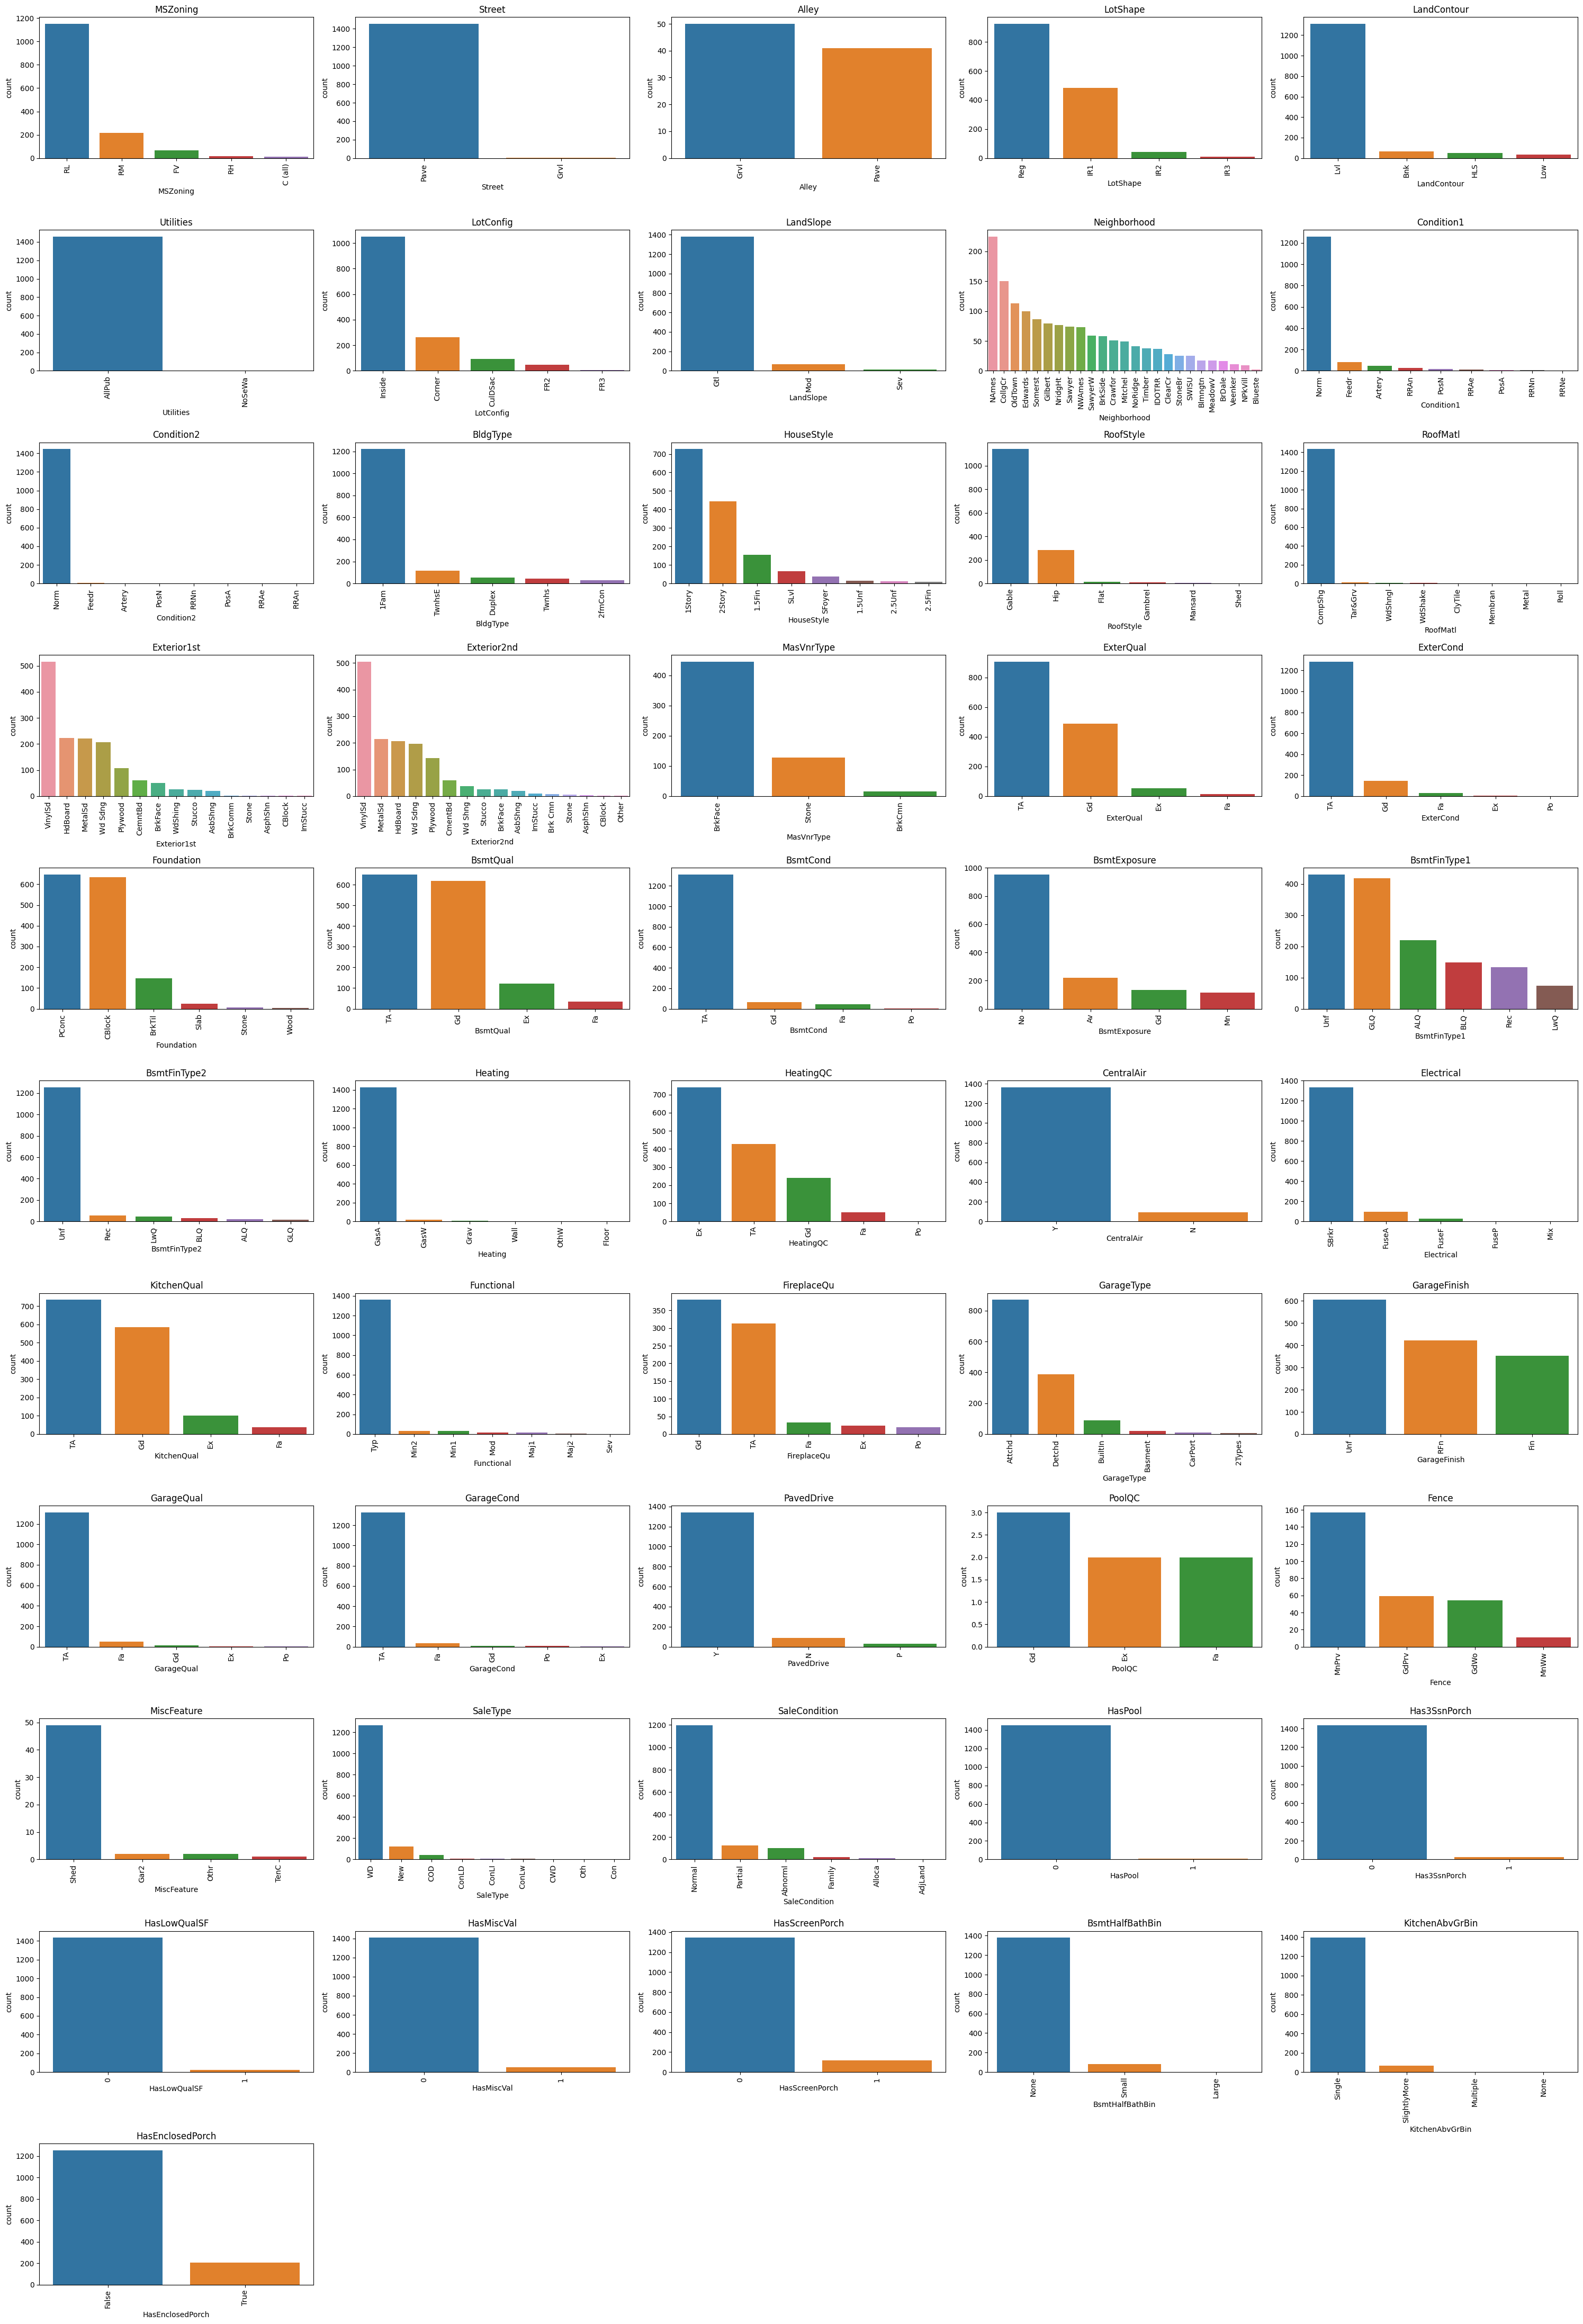

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

# Get all categorical columns
cat_cols = df.select_dtypes(include='category').columns

# Plot
n_cols = 5  # plots per row
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


### NA's Verification

In [24]:
print(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])
len(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64


19

In [ ]:
# Temporarily set to show all rows
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# NA - No Garage
#To check we can use Garage Area and we can see it is 0 for where there are NA's therefore NA means no garage.
df[df['GarageFinish'].isnull()][['GarageType', 'GarageYrBlt', 'GarageQual','GarageCond', 'GarageArea']]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,GarageType,GarageYrBlt,GarageQual,GarageCond,GarageArea
39,NaN,NaN,NaN,NaN,0
48,NaN,NaN,NaN,NaN,0
78,NaN,NaN,NaN,NaN,0
88,NaN,NaN,NaN,NaN,0
89,NaN,NaN,NaN,NaN,0
99,NaN,NaN,NaN,NaN,0
108,NaN,NaN,NaN,NaN,0
125,NaN,NaN,NaN,NaN,0
127,NaN,NaN,NaN,NaN,0
140,NaN,NaN,NaN,NaN,0


In [ ]:
cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']
df[df[cols].isnull().any(axis=1)][cols]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtFinType1,BsmtCond
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,No,NaN,Gd,GLQ,TA
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


In [27]:

# This particular row can be dropped or can be filled with a No
#df.loc[948, 'BsmtExposure'] = 'No'
df = df.drop(index=948)

In [ ]:

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


# pd.set_option('display.max_rows', 1500)  # or use None to show all without limit
# pd.set_option('display.max_columns', None)  # show all columns
# pd.set_option('display.width', None)  # prevent line wrapping
# pd.set_option('display.max_colwidth', None)  # full column contents

df[df['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

# Here they have not mentioned that NA means not having vahneer but we have assumed there is no vahneer as their respective
# area is 0 which is same with the other cases.

# For nearly 864 rows if the vaneer type is null then the vaneer area is 0. 
# For other 8 entries we make the the vaneer area 0 as the Type is null.

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [29]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'HasPool', 'Has3SsnPorch', 'Has

### NA's Imputation

In [31]:
# ----------------------------
# 1. FILL BASEMENT FEATURES
# ----------------------------

# Fill remaining basement columns — add 'None' to categories first
basement_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']
for col in basement_cols:
    if df[col].dtype.name == 'category' and 'None' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('None')
    df[col] = df[col].fillna('None')


# ----------------------------
# 2. FILL GARAGE FEATURES
# ----------------------------

# Fill categorical garage columns with 'None'
garage_cat_cols = ['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']
for col in garage_cat_cols:
    if df[col].dtype.name == 'category' and 'None' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('None')
    df[col] = df[col].fillna('None')

# Fill numerical garage year with 0 (indicating no garage)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)


# ----------------------------
# 3. FILL FIREPLACE
# ----------------------------

# FireplaceQu missing only if Fireplaces == 0 → fill with 'None'
if df['FireplaceQu'].dtype.name == 'category' and 'None' not in df['FireplaceQu'].cat.categories:
    df['FireplaceQu'] = df['FireplaceQu'].cat.add_categories('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')


# ----------------------------
# 4. FILL POOL, MISC, ALLEY, FENCE
# ----------------------------

for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence']:
    if df[col].dtype.name == 'category' and 'None' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('None')
    df[col] = df[col].fillna('None')


# ----------------------------
# 5. FILL MASONRY VENEER
# ----------------------------

if df['MasVnrType'].dtype.name == 'category' and 'None' not in df['MasVnrType'].cat.categories:
    df['MasVnrType'] = df['MasVnrType'].cat.add_categories('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


# ----------------------------
# 6. FILL LOTFRONTAGE
# ----------------------------

# Use Neighborhood + LotConfig to guide median imputation
df['LotFrontage'] = df.groupby(['Neighborhood', 'LotConfig'])['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)


# ----------------------------
# 7. FILL ELECTRICAL
# ----------------------------

# Only 1 missing → use mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [32]:
print(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])
len(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])

LotFrontage    5
dtype: int64


1

In [33]:
# Filling with global median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [34]:
print(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])
len(df.isna().sum().sort_values(ascending=False)[lambda x: x > 0])

Series([], dtype: int64)


0

In [36]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC',
       'Fence', 'MiscFeatur

### Feature Engineering

In [37]:
import numpy as np


# 1. Age of the house
df['AgeOfHouse'] = df['YrSold'] - df['YearBuilt']

# 2. Years since last remodel
df['AgeSinceRemod'] = df['YrSold'] - df['YearRemodAdd']

# 3. Binary flag: was the house remodeled?
df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)

# 4. Composite quality score
df['HouseQualityScore'] = df['OverallQual'] * df['OverallCond']

# 5. Binary flag: was the house sold in the year it was built?
df['IsNew'] = (df['YrSold'] == df['YearBuilt']).astype(int)

# 6. Room per area ratio — handle divide-by-zero safely
df['RoomPerArea'] = df['TotRmsAbvGrd'] / df['GrLivArea']
df['RoomPerArea'] = df['RoomPerArea'].replace([np.inf, -np.inf], 0).fillna(0)

# 7. Garage age — handle missing values
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
df['GarageAge'] = df['GarageAge'].fillna(-1)


In [38]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


# pd.set_option('display.max_rows', 1800)  # or use None to show all without limit
# pd.set_option('display.max_columns', None)  # show all columns
# pd.set_option('display.width', None)  # prevent line wrapping
# pd.set_option('display.max_colwidth', None)  # full column contents

# List of engineered feature columns
engineered_cols = [
    'AgeOfHouse',
    'AgeSinceRemod',
    'IsRemodeled',
    'HouseQualityScore',
    'IsNew',
    'RoomPerArea',
    'GarageAge'
]

# Display these columns
df[engineered_cols]


,AgeOfHouse,AgeSinceRemod,IsRemodeled,HouseQualityScore,IsNew,RoomPerArea,GarageAge
0,5,5,0,35,0,1.074571,5.0
1,31,31,0,48,0,0.840190,31.0
2,7,6,1,35,0,0.801251,7.0
3,91,36,1,35,0,0.939734,8.0
4,8,8,0,40,0,1.169475,8.0
...,...,...,...,...,...,...,...
1455,8,7,1,30,0,0.945011,8.0
1456,32,22,1,36,0,0.916562,32.0
1457,69,4,1,63,0,1.160043,69.0
1458,60,14,1,30,0,0.715944,60.0


### Encoding oridinal and nominal features

In [39]:

ordinal_features = [
    'LotShape', 'LandSlope', 'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive',
    'PoolQC', 'Fence',
    'BsmtHalfBathBin', 'KitchenAbvGrBin'
]
nominal_features = [
    'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
    'Heating', 'CentralAir', 'Electrical', 'GarageType',
    'MiscFeature', 'SaleType', 'SaleCondition',
    'HasPool', 'Has3SsnPorch', 'HasLowQualSF', 'HasMiscVal',
    'HasScreenPorch', 'HasEnclosedPorch'
]

In [40]:
print("BsmtHalfBathBin:", df['BsmtHalfBathBin'].unique())
print("KitchenAbvGrBin:", df['KitchenAbvGrBin'].unique())

BsmtHalfBathBin: ['None', 'Small', 'Large']
Categories (3, object): ['None' < 'Small' < 'Large']
KitchenAbvGrBin: ['Single', 'SlightlyMore', 'Multiple', 'None']
Categories (4, object): ['None' < 'Single' < 'SlightlyMore' < 'Multiple']


In [41]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


# poor to excellent
# Define ordinal mappings for each ordinal feature
ordinal_mappings = {
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'BsmtHalfBathBin': ['None', 'Small', 'Large'],
    'KitchenAbvGrBin': ['None', 'Single', 'SlightlyMore', 'Multiple'],

}

# Ensure order is respected by using a list of lists in the correct order
ordinal_features_ordered = list(ordinal_mappings.keys())
categories = [ordinal_mappings[feature] for feature in ordinal_features_ordered]

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=categories)
df[ordinal_features_ordered] = ordinal_encoder.fit_transform(df[ordinal_features_ordered])

# One-hot encode nominal features
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Display result
print("Ordinal and nominal encoding complete.")


Ordinal and nominal encoding complete.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 211 entries, Id to HasEnclosedPorch_True
dtypes: bool(153), float64(38), int64(20)
memory usage: 890.5 KB


### High Correlation Features

In [43]:
# High Correlation Features

import pandas as pd

# Select only int and float columns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr().abs()  # use absolute correlation

# Unstack the matrix into pairwise correlations
corr_pairs = corr_matrix.unstack()

# Remove self-correlations (correlation of a variable with itself)
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Drop duplicate pairs (e.g., (A, B) and (B, A))
corr_pairs = corr_pairs.drop_duplicates()

# Filter for high correlation (e.g., > 0.8)
high_corr = corr_pairs[corr_pairs > 0.8].sort_values(ascending=False)

# Display the result
print(high_corr)

GarageYrBlt          GarageAge                0.999996
YearBuilt            AgeOfHouse               0.999036
GarageYrBlt          GarageType_None          0.998601
GarageAge            GarageType_None          0.998597
YearRemodAdd         AgeSinceRemod            0.997932
TotRmsAbvGrd         RoomPerArea              0.992464
SaleType_New         SaleCondition_Partial    0.986818
MiscFeature_None     HasMiscVal_1             0.980609
Exterior1st_VinylSd  Exterior2nd_VinylSd      0.977496
Exterior1st_CemntBd  Exterior2nd_CmentBd      0.974170
Exterior1st_MetalSd  Exterior2nd_MetalSd      0.973062
MasVnrArea           MasVnrType_None          0.972630
GarageQual           GarageCond               0.959170
MiscFeature_Shed     MiscFeature_None         0.950889
GarageYrBlt          GarageCond               0.949409
GarageCond           GarageAge                0.949400
MiscFeature_Shed     HasMiscVal_1             0.949171
GarageYrBlt          GarageQual               0.946626
GarageQual

### High Collinear Features

In [44]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Create a temporary DataFrame for VIF analysis
temp_df = df.copy()

# 2. Drop the target column (SalePrice)
temp_df = temp_df.drop(columns=['SalePrice'], errors='ignore')

# 3. Select only numeric (int, float) and boolean columns
numeric_cols = temp_df.select_dtypes(include=['int64', 'float64', 'bool'])

# 4. Convert bool columns to integers
numeric_cols = numeric_cols.astype({col: int for col in numeric_cols.select_dtypes('bool').columns})

# 5. Add constant for intercept
X = add_constant(numeric_cols)

# 6. Compute VIF
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 7. Drop the constant
vif_df = vif_df[vif_df['Feature'] != 'const']

# 8. Display sorted VIF
print(vif_df.sort_values(by='VIF', ascending=False))


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Feature       VIF
138  Exterior1st_CBlock       inf
9             YearBuilt       inf
35          GarageYrBlt       inf
47               YrSold       inf
152  Exterior2nd_CBlock       inf
..                  ...       ...
46               MoSold  1.230261
71        LotConfig_FR3  1.212475
193        SaleType_Con  1.188592
1                    Id  1.181655
103     Condition1_RRNe  1.177649

[210 rows x 2 columns]


In [45]:
# Filter features with VIF > 5
high_vif = vif_df[vif_df['VIF'] > 5]
print(high_vif)

                   Feature        VIF
2               MSSubClass  17.772130
4                  LotArea   5.030354
7              OverallQual  41.480537
8              OverallCond  26.334382
9                YearBuilt        inf
..                     ...        ...
197           SaleType_New  50.099485
199            SaleType_WD   5.530438
204  SaleCondition_Partial  46.768085
205              HasPool_1  13.142315
208           HasMiscVal_1  50.062054

[108 rows x 2 columns]


In [46]:
# There 25+ pairs of highly correlated features and 100 highly collinear features 

### Ridge Regression

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'ridge__alpha': 253.9321728179581, 'ridge__fit_intercept': True, 'ridge__solver': 'lsqr'}
Best CV RMSE: 0.13209155981475632


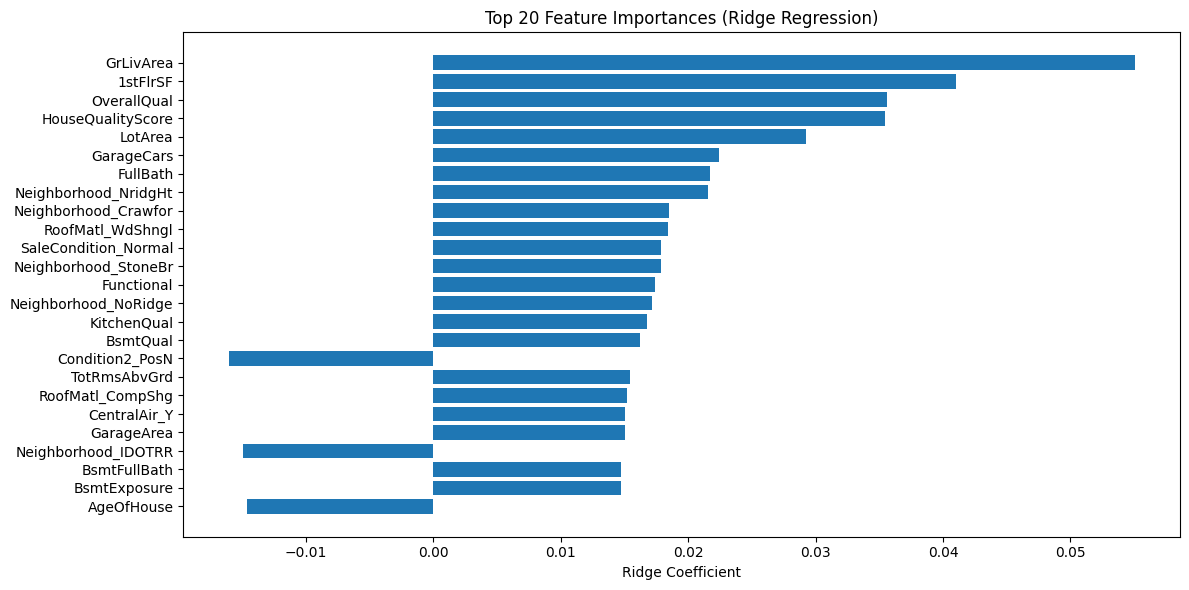

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import loguniform
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)


# -----------------------------
# 1. Prepare Features and Target
# -----------------------------
X = df.select_dtypes(include=['int64', 'float64', 'bool']).drop(columns=['SalePrice'])
y = df['SalePrice']

# -----------------------------
# 2. Build Pipeline
# -----------------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# -----------------------------
# 3. Hyperparameter Search Space
# -----------------------------
param_dist = {
    'ridge__alpha': loguniform(1e-4, 1e3),
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# -----------------------------
# 4. Randomized SearchCV (Cross-validation only)
# -----------------------------
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=60,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X, y)

# -----------------------------
# 5. Print Results
# -----------------------------
print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

# -----------------------------
# 6. Feature Importance Plot
# -----------------------------
coefs = search.best_estimator_.named_steps['ridge'].coef_
feature_names = X.columns
coefs_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coefs_df['AbsCoef'] = coefs_df['Coefficient'].abs()
coefs_df = coefs_df.sort_values(by='AbsCoef', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(12, 6))
plt.barh(coefs_df['Feature'][:25][::-1], coefs_df['Coefficient'][:25][::-1])
plt.xlabel("Ridge Coefficient")
plt.title("Top 20 Feature Importances (Ridge Regression)")
plt.tight_layout()
plt.show()


### PCA : Dimensionality Reduction

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # keep 95% variance
X_pca = pca.fit_transform(X_scaled)


Original features: 210
Reduced to 134 components to retain 95% variance


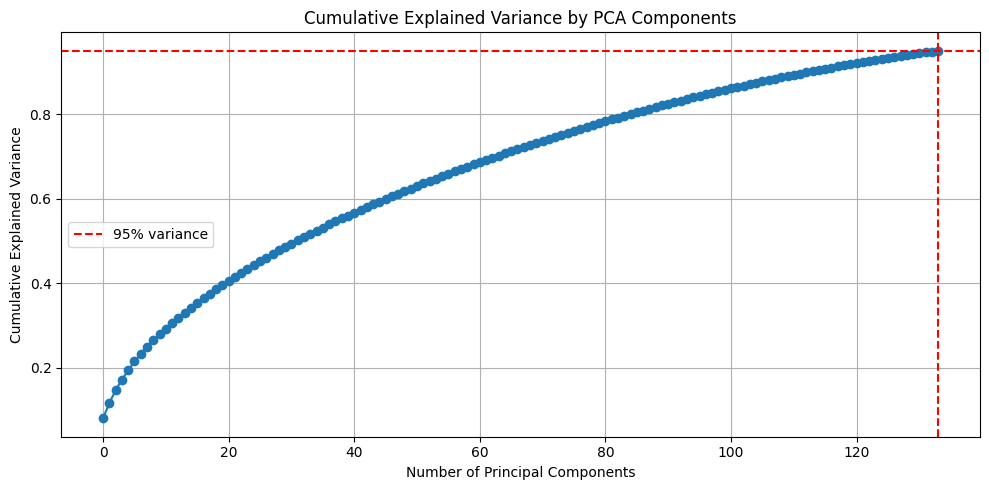

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Select numerical features
# -------------------------------
X = df.select_dtypes(include=['int64', 'float64', 'bool']).drop(columns=['SalePrice'])

# -------------------------------
# 2. Standardize the data
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. Fit PCA to keep 95% variance
# -------------------------------
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# -------------------------------
# 4. Summary of explained variance
# -------------------------------
explained_var_ratio = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var_ratio)

print(f"Original features: {X.shape[1]}")
print(f"Reduced to {X_pca.shape[1]} components to retain 95% variance")

# -------------------------------
# 5. Plot explained variance
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(cum_explained_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=X_pca.shape[1]-1, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
# Get component weights (loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X.columns
)

# Show top contributing features for each principal component
for i in range(5):  # first 5 PCs
    print(f"\nTop features contributing to PC{i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(10))



Top features contributing to PC1:
AgeOfHouse       0.197597
YearBuilt        0.197493
OverallQual      0.197289
ExterQual        0.184083
GarageCars       0.182525
GarageFinish     0.179542
BsmtQual         0.176348
KitchenQual      0.174922
GarageArea       0.171654
AgeSinceRemod    0.166765
Name: PC1, dtype: float64

Top features contributing to PC2:
TotalBsmtFinSF        0.224798
BsmtFinSF1            0.207170
Foundation_CBlock     0.202477
2ndFlrSF              0.195017
MSZoning_RL           0.181252
HouseStyle_2Story     0.160738
HouseStyle_1Story     0.159988
MSSubClass            0.154760
BsmtFinType1          0.150727
Neighborhood_NAmes    0.139834
Name: PC2, dtype: float64

Top features contributing to PC3:
TotRmsAbvGrd         0.278931
RoomPerArea          0.270730
GrLivArea            0.259241
BedroomAbvGr         0.240775
LotArea              0.218880
2ndFlrSF             0.191849
LotFrontage          0.169806
BldgType_TwnhsE      0.160669
Fireplaces           0.160069
Hou

### Modelling With & Without Dimensionality Reduction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

# ---------------------------
# 1. Feature Prep
# ---------------------------
X = df.select_dtypes(include=['int64', 'float64', 'bool']).drop(columns=['SalePrice'])
y = df['SalePrice']

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with 95% variance retained
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# ---------------------------
# 2. Define Models & Params
# ---------------------------
models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': randint(100, 1000),
            'max_depth': randint(5, 50),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': randint(5, 50),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
        'params': {
            'n_estimators': randint(100, 1000),
            'max_depth': randint(3, 15),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5)
        }
    }
}

# ---------------------------
# 3. Compare on Scaled vs PCA
# ---------------------------
results = []
datasets = {'Scaled': X_scaled, 'PCA': X_pca}

for data_label, X_input in datasets.items():
    for model_name, model_info in models.items():
        print(f"Training {model_name} on {data_label} data...")
        search = RandomizedSearchCV(
            estimator=model_info['model'],
            param_distributions=model_info['params'],
            n_iter=60,
            cv=5,
            scoring='neg_root_mean_squared_error',
            random_state=42,
            n_jobs=-1,
            verbose=0
        )
        search.fit(X_input, y)
        results.append({
            'Model': model_name,
            'Input': data_label,
            'CV_RMSE': -search.best_score_,
            **search.best_params_
        })

# ---------------------------
# 4. Display Results
# ---------------------------
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='CV_RMSE'))


In [54]:
results_df

,Model,Input,CV_RMSE,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,colsample_bytree,learning_rate,subsample
0,RandomForest,Scaled,0.141556,37,auto,3.0,3.0,152.0,NaN,NaN,NaN
1,DecisionTree,Scaled,0.186041,46,auto,9.0,7.0,NaN,NaN,NaN,NaN
2,XGBoost,Scaled,0.122436,5,NaN,NaN,NaN,252.0,0.504599,0.040441,0.502531
3,RandomForest,PCA,0.152285,45,auto,4.0,2.0,497.0,NaN,NaN,NaN
4,DecisionTree,PCA,0.191419,6,auto,5.0,6.0,NaN,NaN,NaN,NaN
5,XGBoost,PCA,0.139916,3,NaN,NaN,NaN,661.0,0.916597,0.062009,0.831261


In [55]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='CV_RMSE')

# Save to CSV in Kaggle output directory
results_df_sorted.to_csv('/kaggle/working/model_comparison_results.csv', index=False)

# Optional: confirm it was saved
print("Saved to /kaggle/working/model_comparison_results.csv")

Saved to /kaggle/working/model_comparison_results.csv


In [57]:
results_df_loaded = pd.read_csv('/kaggle/working/model_comparison_results.csv')

results_df_loaded.sort_values(by='CV_RMSE')

,Model,Input,CV_RMSE,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,colsample_bytree,learning_rate,subsample
0,XGBoost,Scaled,0.122436,5,NaN,NaN,NaN,252.0,0.504599,0.040441,0.502531
1,XGBoost,PCA,0.139916,3,NaN,NaN,NaN,661.0,0.916597,0.062009,0.831261
2,RandomForest,Scaled,0.141556,37,auto,3.0,3.0,152.0,NaN,NaN,NaN
3,RandomForest,PCA,0.152285,45,auto,4.0,2.0,497.0,NaN,NaN,NaN
4,DecisionTree,Scaled,0.186041,46,auto,9.0,7.0,NaN,NaN,NaN,NaN
5,DecisionTree,PCA,0.191419,6,auto,5.0,6.0,NaN,NaN,NaN,NaN


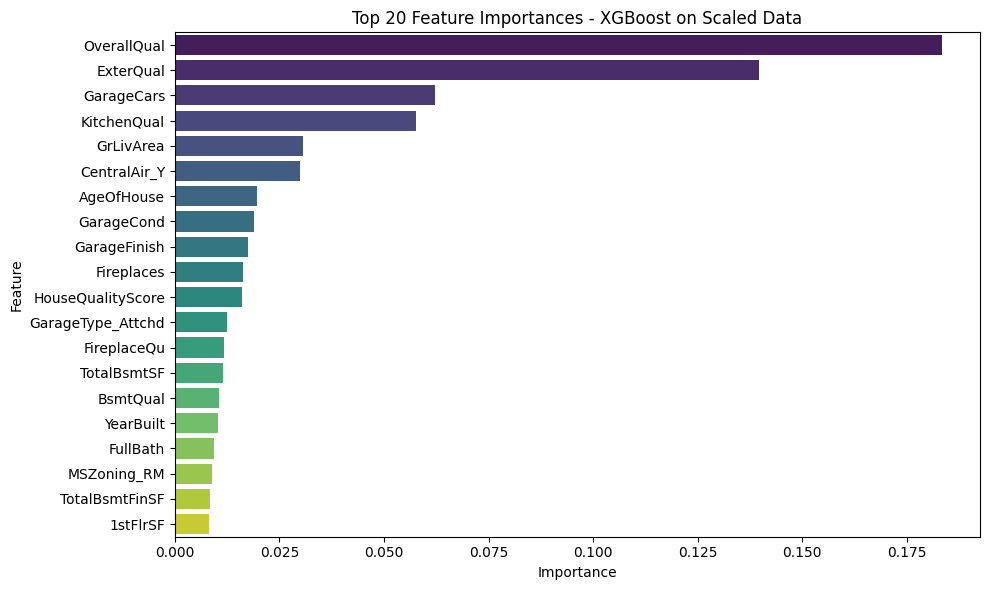

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# 1. Extract best XGBoost parameters for Scaled input
xgb_row = results_df_loaded[
    (results_df_loaded['Model'] == 'XGBoost') & 
    (results_df_loaded['Input'] == 'Scaled')
].drop(columns=['Model', 'Input', 'CV_RMSE']).iloc[0]

# 2. Cast parameters to correct types
xgb_params = xgb_row.to_dict()
xgb_params['n_estimators'] = int(xgb_params['n_estimators'])
xgb_params['max_depth'] = int(xgb_params['max_depth'])

# 3. Create and fit model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0, **xgb_params)
xgb.fit(X_scaled, y)

# 4. Feature importances
importances = xgb.feature_importances_
feature_names = df.select_dtypes(include=['int64', 'float64', 'bool']).drop(columns=['SalePrice']).columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

# 5. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances - XGBoost on Scaled Data')
plt.tight_layout()
plt.show()


In [60]:
import joblib

# Save the trained model
joblib.dump(xgb, '/kaggle/working/best_xgboost_model_scaled.pkl')

print("Model saved to /kaggle/working/best_xgboost_model_scaled.pkl")

Model saved to /kaggle/working/best_xgboost_model_scaled.pkl
